In [1]:
import pandas as pd
import numpy as np
import os
import env
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [2]:
# creating a connection to connect to the Codeup Student Database
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [3]:
def get_zillow_data():
    '''This function will connect to the Codeup Student Database. It will then cache a local copy to the computer to use for later
        in the form of a CSV file. If you want to reproduce the results, you will need your own env.py file and database credentials.'''
    filename = "zillow.csv"
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('''
            SELECT * FROM properties_2017
            JOIN predictions_2017 ON properties_2017.parcelid = predictions_2017.parcelid
            JOIN airconditioningtype ON properties_2017.airconditioningtypeid = airconditioningtype.airconditioningtypeid
            JOIN heatingorsystemtype ON properties_2017.heatingorsystemtypeid = heatingorsystemtype.heatingorsystemtypeid
            JOIN architecturalstyletype ON properties_2017.architecturalstyletypeid = architecturalstyletype.architecturalstyletypeid
            JOIN propertylandusetype ON properties_2017.propertylandusetypeid = propertylandusetype.propertylandusetypeid
            JOIN typeconstructiontype ON properties_2017.typeconstructiontypeid = typeconstructiontype.typeconstructiontypeid
            WHERE properties_2017.propertylandusetypeid = '261' OR '262' OR '263' OR '264' OR '268' OR '273' OR '274' OR '275' OR '276' OR '279'
            AND transactiondate BETWEEN '2017-05-01' AND '2017-06-30';
            ''' , get_connection('zillow'))
        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename)
        # Return the dataframe to the calling code
        return df

In [4]:
df= get_zillow_data()
df.head()

,Unnamed: 0,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,airconditioningtypeid.1,airconditioningdesc,heatingorsystemtypeid.1,heatingorsystemdesc,architecturalstyletypeid.1,architecturalstyledesc,propertylandusetypeid.1,propertylandusedesc,typeconstructiontypeid.1,typeconstructiondesc
0,0,2874473,14172985,1.0,7.0,NaN,2.5,4.0,NaN,NaN,...,1,Central,6,Forced air,7,Contemporary,261,Single Family Residential,6,Frame
1,1,803551,14633780,11.0,8.0,NaN,1.0,2.0,NaN,NaN,...,11,Wall Unit,6,Forced air,8,Conventional,266,Condominium,6,Frame
2,2,1325329,14531476,11.0,7.0,NaN,2.0,2.0,NaN,NaN,...,11,Wall Unit,18,Radiant,7,Contemporary,261,Single Family Residential,6,Frame
3,3,699288,14668372,11.0,21.0,NaN,2.0,2.0,NaN,NaN,...,11,Wall Unit,18,Radiant,21,Ranch/Rambler,266,Condominium,6,Frame
4,4,757768,14287849,1.0,7.0,NaN,2.0,3.0,NaN,NaN,...,1,Central,6,Forced air,7,Contemporary,261,Single Family Residential,6,Frame


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 74 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    116 non-null    int64  
 1   id                            116 non-null    int64  
 2   parcelid                      116 non-null    int64  
 3   airconditioningtypeid         116 non-null    float64
 4   architecturalstyletypeid      116 non-null    float64
 5   basementsqft                  0 non-null      float64
 6   bathroomcnt                   116 non-null    float64
 7   bedroomcnt                    116 non-null    float64
 8   buildingclasstypeid           0 non-null      float64
 9   buildingqualitytypeid         0 non-null      float64
 10  calculatedbathnbr             116 non-null    float64
 11  decktypeid                    0 non-null      float64
 12  finishedfloor1squarefeet      0 non-null      float64
 13  calcu

In [6]:
# drop columns with more than 50% (58 count) nulls and duplicate/similar columns
df=df.drop(columns=['garagetotalsqft','fullbathcnt','calculatedbathnbr', 'finishedsquarefeet12','heatingorsystemtypeid','id','propertylandusetypeid','airconditioningtypeid','architecturalstyletypeid','typeconstructiontypeid.1','parcelid.1', 'parcelid.1', 'id.1','Unnamed: 0','basementsqft','buildingclasstypeid', 'buildingqualitytypeid', 'decktypeid', 'finishedfloor1squarefeet','finishedsquarefeet13', 'finishedsquarefeet15',  'finishedsquarefeet50','finishedsquarefeet6','fireplacecnt','hashottuborspa', 'lotsizesquarefeet', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertyzoningdesc', 'regionidneighborhood', 'storytypeid', 'threequarterbathnbr', 'unitcnt','yardbuildingsqft17','yardbuildingsqft26','fireplaceflag', 'airconditioningtypeid.1','heatingorsystemtypeid.1','architecturalstyletypeid.1', 'propertylandusetypeid.1', 'taxdelinquencyflag', 'taxdelinquencyyear','typeconstructiontypeid'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      116 non-null    int64  
 1   bathroomcnt                   116 non-null    float64
 2   bedroomcnt                    116 non-null    float64
 3   calculatedfinishedsquarefeet  116 non-null    float64
 4   fips                          116 non-null    float64
 5   garagecarcnt                  116 non-null    float64
 6   latitude                      116 non-null    float64
 7   longitude                     116 non-null    float64
 8   poolcnt                       93 non-null     float64
 9   propertycountylandusecode     116 non-null    int64  
 10  rawcensustractandblock        116 non-null    float64
 11  regionidcity                  116 non-null    float64
 12  regionidcounty                116 non-null    float64
 13  regio

In [39]:
df.head(10)

,parcel_id,bathroom_count,bedroom_count,square_feet,fips,car_size_garage,latitude,longitude,pool_count,propertycountylandusecode,...,land_tax_value_dollar_count,taxamount,censustractandblock,logerror,transactiondate,airconditioning,heating,architectural_style,property_type,construction_type
0,14172985,2.5,4.0,1658.0,6059.0,2.0,33905686.0,-117860621.0,1.0,122,...,73035.0,2795.12,6.059012e+13,0.007491,2017-01-03,Central,Forced air,Contemporary,Single Family Residential,Frame
1,14633780,1.0,2.0,838.0,6059.0,1.0,33739203.0,-117921838.0,1.0,34,...,79591.0,1766.48,6.059099e+13,0.067501,2017-01-04,Wall Unit,Forced air,Conventional,Condominium,Frame
2,14531476,2.0,2.0,1369.0,6059.0,1.0,33728400.0,-117830000.0,1.0,122,...,121715.0,2551.74,6.059076e+13,0.016042,2017-01-04,Wall Unit,Radiant,Contemporary,Single Family Residential,Frame
3,14668372,2.0,2.0,1042.0,6059.0,1.0,33830900.0,-117975000.0,1.0,34,...,103734.0,2200.12,6.059087e+13,0.143446,2017-01-06,Wall Unit,Radiant,Ranch/Rambler,Condominium,Frame
4,14287849,2.0,3.0,1234.0,6059.0,1.0,33725799.0,-117807218.0,1.0,122,...,280991.0,3969.70,6.059053e+13,-0.026650,2017-01-09,Central,Forced air,Contemporary,Single Family Residential,Frame
5,14159038,2.0,3.0,1463.0,6059.0,1.0,33927608.0,-117892673.0,1.0,122,...,77682.0,1946.32,6.059002e+13,0.030711,2017-01-12,Central,Forced air,Contemporary,Single Family Residential,Frame
6,14607235,2.0,2.0,1254.0,6059.0,1.0,33779300.0,-117941000.0,1.0,34,...,230353.0,4258.50,6.059089e+13,0.010250,2017-01-18,Central,Forced air,Contemporary,Condominium,Frame
7,14675554,2.0,2.0,979.0,6059.0,2.0,33655800.0,-117909000.0,1.0,34,...,212176.0,3523.84,6.059064e+13,0.142667,2017-01-22,Central,Forced air,Contemporary,Condominium,Frame
8,14133281,2.5,4.0,1693.0,6059.0,2.0,33879652.0,-117969750.0,1.0,122,...,399544.0,6152.60,6.059111e+13,0.247303,2017-01-23,Central,Forced air,Contemporary,Single Family Residential,Frame
9,14649489,2.5,2.0,1346.0,6059.0,1.0,33780518.0,-118012970.0,1.0,34,...,85408.0,2340.06,6.059110e+13,0.968414,2017-01-24,Central,Forced air,Conventional,Condominium,Frame


In [9]:
df= df.rename(columns={"parcelid": "parcel_id", "bedroomcnt": "bedroom_count","bathroomcnt": "bathroom_count",
                       "calculatedfinishedsquarefeet": "square_feet", "airconditioningdesc": "airconditioning",
                       "heatingorsystemdesc": "heating", "architecturalstyledesc": "architectural_style",
                       "propertylandusedesc": "property_type", "typeconstructiondesc": "construction_type",
                      "poolcnt": "pool_count", "roomcnt": "room_count", "taxvaluedollarcnt": "tax_value_dollar_count",
                       "structuretaxvaluedollarcnt": "structure_tax_value_dollar_count","landtaxvaluedollarcnt": "land_tax_value_dollar_count", "taxmount": "tax_amount", "garagecarcnt": "car_size_garage"
                      })

In [10]:

df['pool_count'].fillna(df['pool_count'].mode()[0], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   parcel_id                         116 non-null    int64  
 1   bathroom_count                    116 non-null    float64
 2   bedroom_count                     116 non-null    float64
 3   square_feet                       116 non-null    float64
 4   fips                              116 non-null    float64
 5   car_size_garage                   116 non-null    float64
 6   latitude                          116 non-null    float64
 7   longitude                         116 non-null    float64
 8   pool_count                        116 non-null    float64
 9   propertycountylandusecode         116 non-null    int64  
 10  rawcensustractandblock            116 non-null    float64
 11  regionidcity                      116 non-null    float64
 12  regionid

In [12]:
def clean_zillow():
    df= get_zillow_data()
    #rename columns to make it easiet to call later
    df= df.rename(columns={"parcelid": "parcel_id", "bedroomcnt": "bedroom_count","bathroomcnt": "bathroom_count",
                      "calculatedfinishedsquarefeet": "square_feet", "airconditioningdesc": "airconditioning",
                      "heatingorsystemdesc": "heating", "architecturalstyledesc": "architectural_style",
                      "propertylandusedesc": "property_type", "typeconstructiondesc": "construction_type",
                      "poolcnt": "pool_count", "roomcnt": "room_count", "taxvaluedollarcnt": "tax_value_dollar_count",
                      "structuretaxvaluedollarcnt": "structure_tax_value_dollar_count","landtaxvaluedollarcnt": "land_tax_value_dollar_count", 
                      "taxmount": "tax_amount","garagecarcnt": "car_size_garage"
                      })
    # drop columns with more than 50% (58 count) nulls and duplicate/similar columns
    df= df.drop(columns=['garagetotalsqft','fullbathcnt','calculatedbathnbr', 'finishedsquarefeet12',
                     'heatingorsystemtypeid','id','propertylandusetypeid','airconditioningtypeid',
                     'architecturalstyletypeid','typeconstructiontypeid.1','parcelid.1', 'parcelid.1', 
                     'id.1','Unnamed: 0','basementsqft','buildingclasstypeid', 'buildingqualitytypeid', 
                     'decktypeid', 'finishedfloor1squarefeet','finishedsquarefeet13', 'finishedsquarefeet15',
                     'finishedsquarefeet50','finishedsquarefeet6','fireplacecnt','hashottuborspa', 
                     'lotsizesquarefeet', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 
                     'propertyzoningdesc', 'regionidneighborhood', 'storytypeid', 'threequarterbathnbr', 
                     'unitcnt','yardbuildingsqft17','yardbuildingsqft26','fireplaceflag', 
                     'airconditioningtypeid.1','heatingorsystemtypeid.1','architecturalstyletypeid.1', 
                     'propertylandusetypeid.1', 'taxdelinquencyflag', 'taxdelinquencyyear','typeconstructiontypeid'])

    #handle any missing values
    df['pool_count'].fillna(df['pool_count'].mode()[0], inplace=True)
    # return the clean dataframe
    return df

In [14]:
zillow = clean_zillow()
zillow.head()
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   parcel_id                         116 non-null    int64  
 1   bathroom_count                    116 non-null    float64
 2   bedroom_count                     116 non-null    float64
 3   square_feet                       116 non-null    float64
 4   fips                              116 non-null    float64
 5   car_size_garage                   116 non-null    float64
 6   latitude                          116 non-null    float64
 7   longitude                         116 non-null    float64
 8   pool_count                        116 non-null    float64
 9   propertycountylandusecode         116 non-null    int64  
 10  rawcensustractandblock            116 non-null    float64
 11  regionidcity                      116 non-null    float64
 12  regionid

In [19]:
#combining my split, train, test data and my clean data into one dataframe
def prep_zillow_data():
    df= clean_zillow()
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123) 
    return train, validate, test
def prep_split_zillow_data():
    df=clean_zillow()
    X_train = train.drop(columns='tax_value_dollar_count')
    X_validate = validate.drop(columns='tax_value_dollar_count')
    X_test = test.drop(columns='tax_value_dollar_count')

    y_train = train['tax_value_dollar_count']
    y_validate = validate['tax_value_dollar_count']
    y_test = test['tax_value_dollar_count']
    return X_train, X_validate, X_test, y_train, y_validate, y_test

In [20]:
train, validate, test = prep_zillow_data()

In [25]:
from scipy import stats
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
cat_vars = ['airconditioning', 'heating', 'architectural_style', 'property_type', 'construction_type', 'alone', 'sex_female']
quant_vars = ['bathroom_count', 'bedroom_count', 'square_feet']


Text(0.5, 1.0, 'Correlation between Number of Bathrooms and Bedrooms')

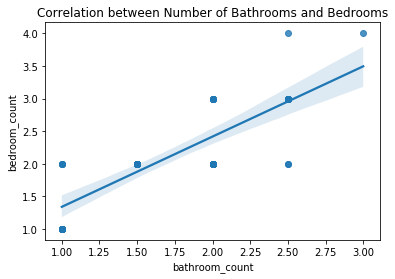

In [27]:
sns.regplot(data= train, x='bathroom_count', y= 'bedroom_count')
plt.title("Correlation between Number of Bathrooms and Bedrooms")

KeyboardInterrupt: 

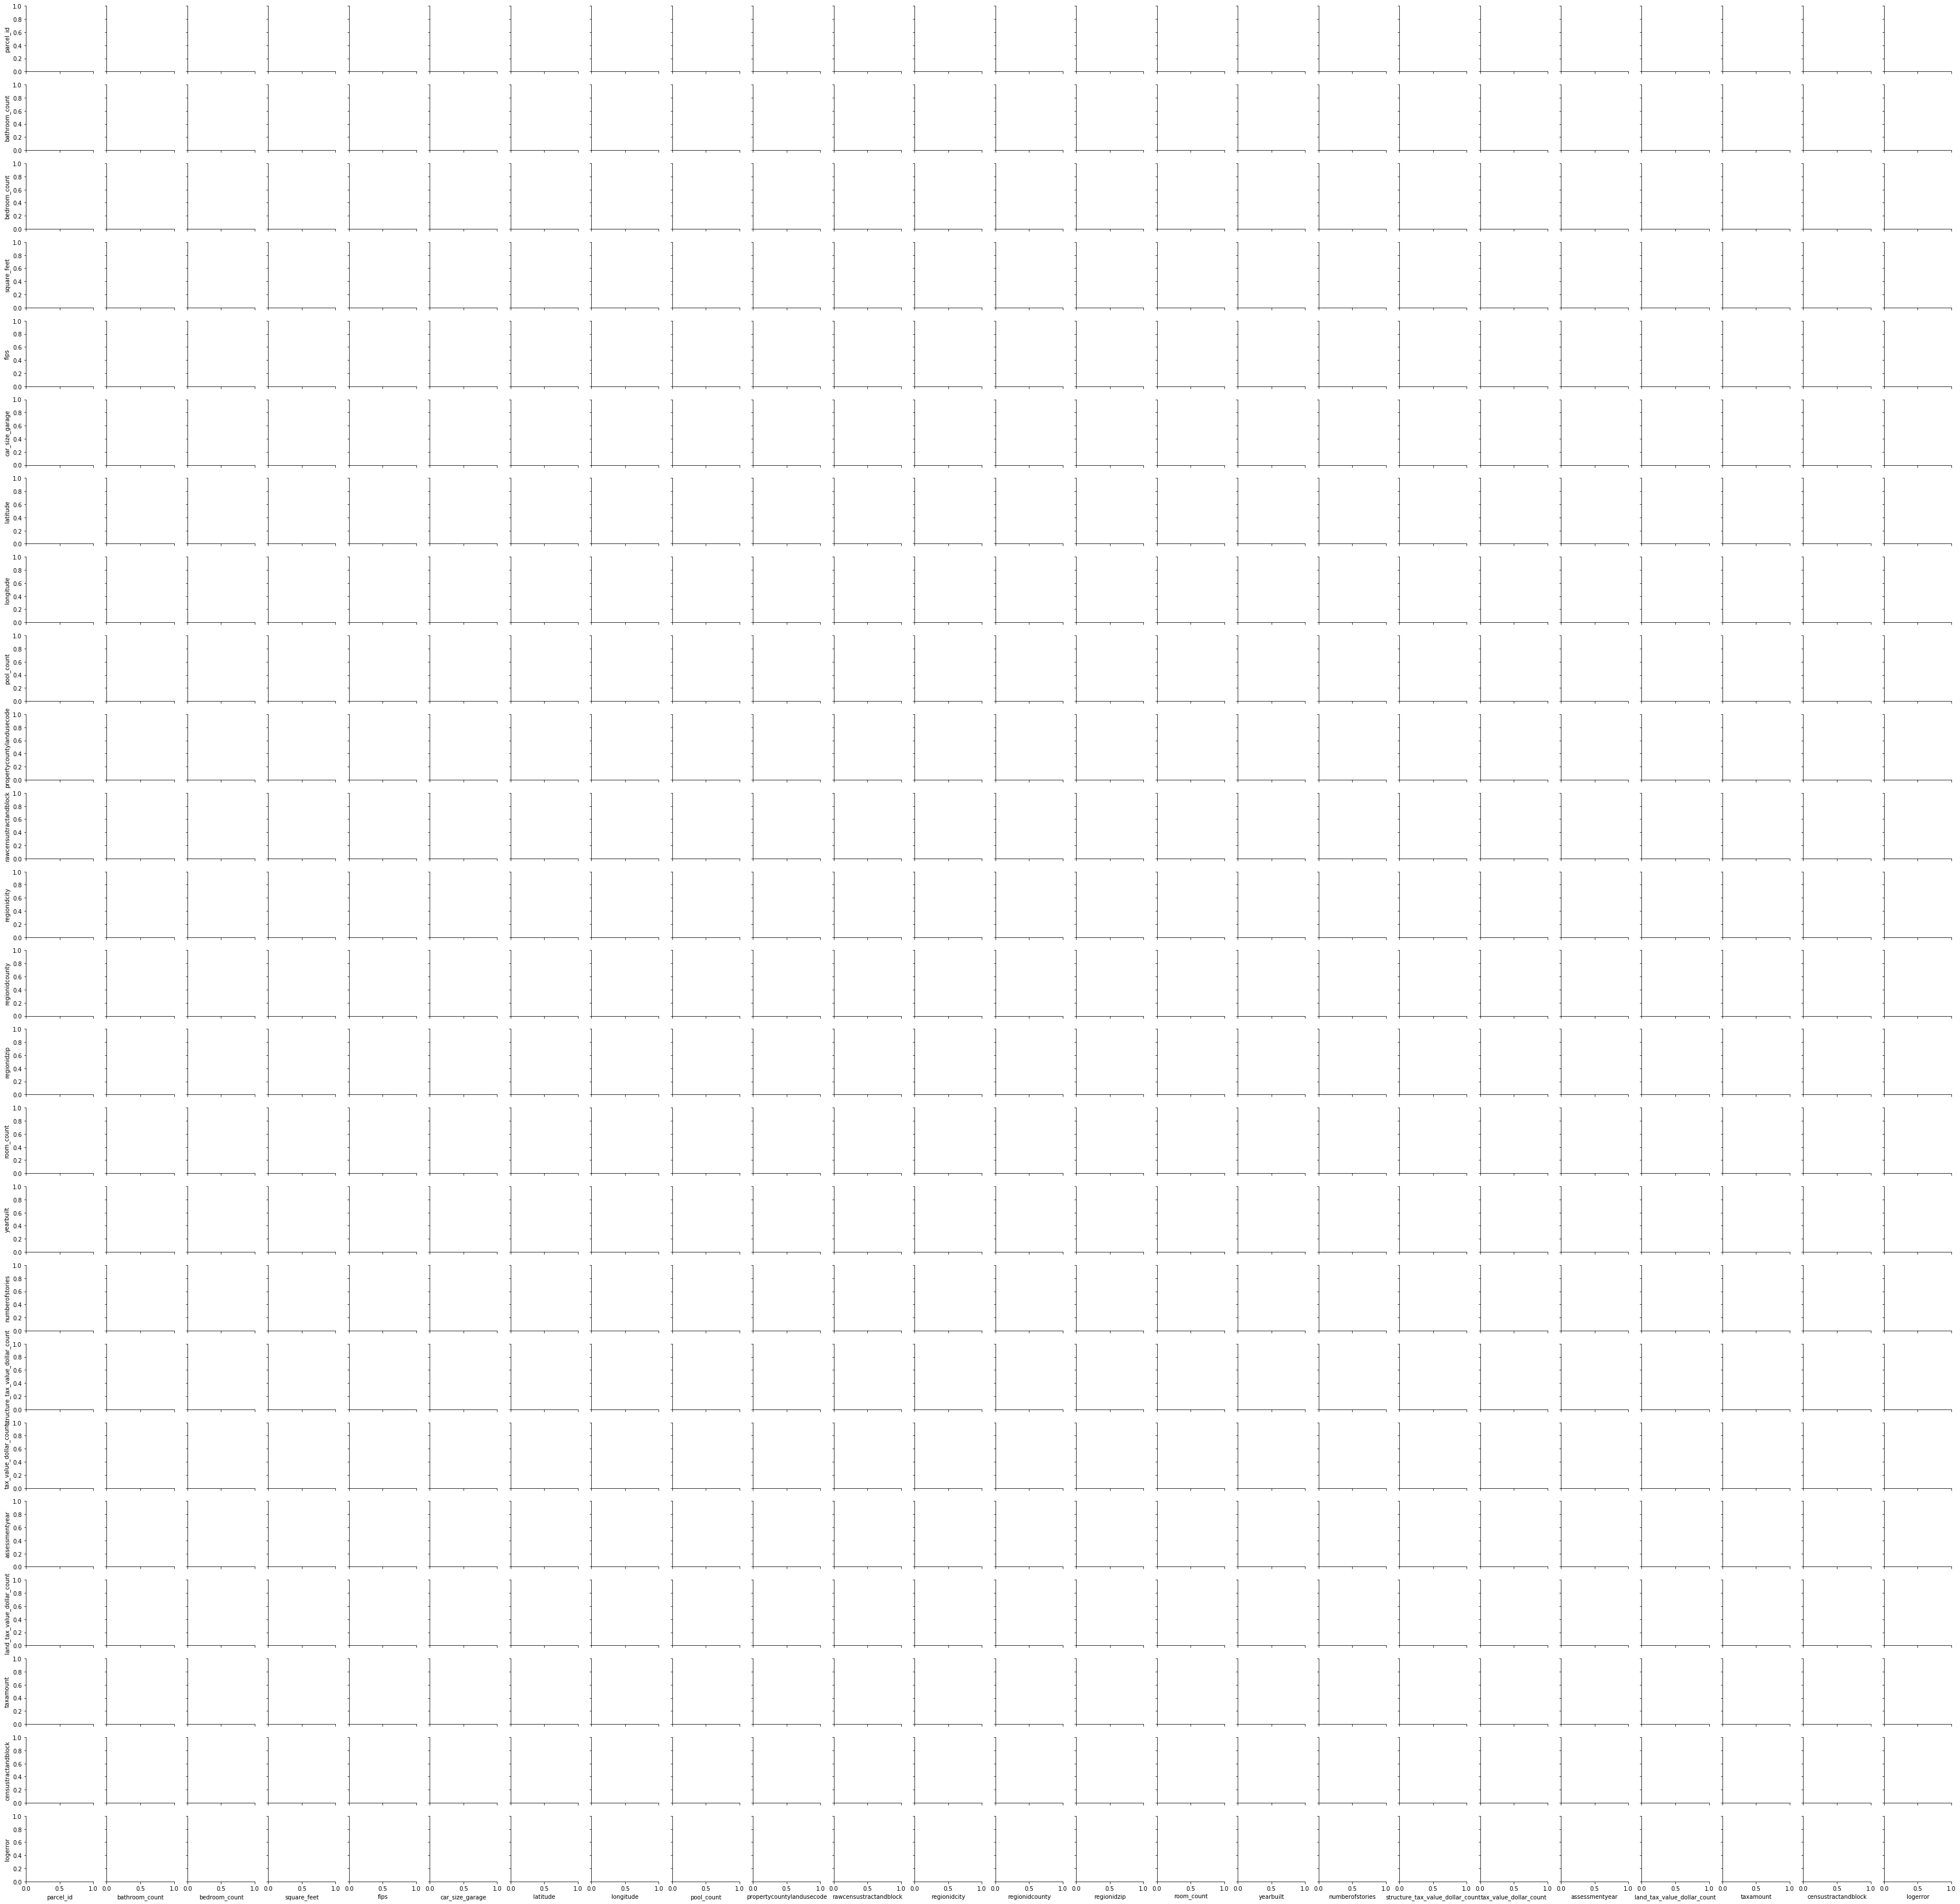

In [35]:
sns.pairplot(data=train)
plt.title('Relationship Plot of Train Data')

Text(0.5, 1, 'Heatmap of Trained Data')

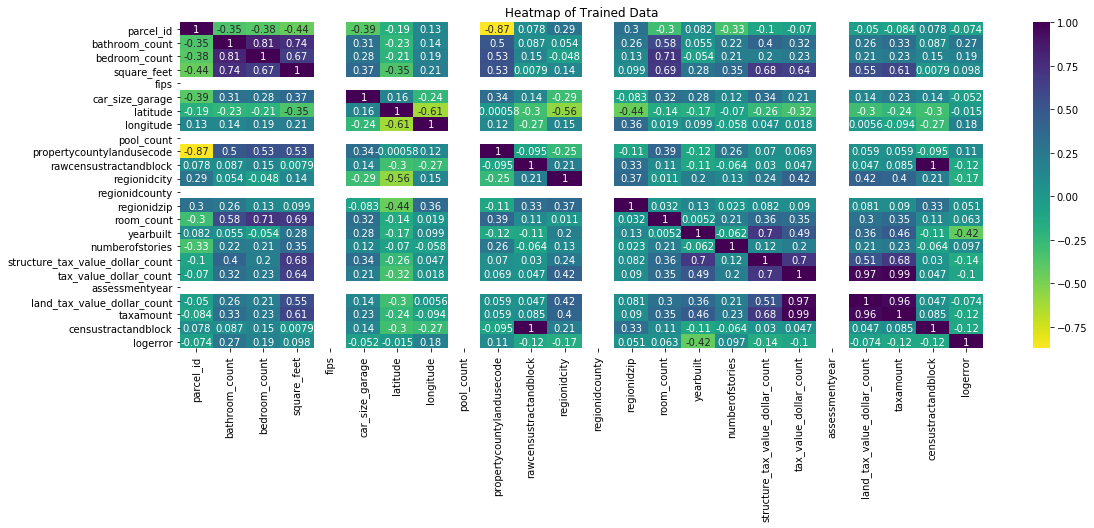

In [34]:
plt.figure(figsize=(18,6))
sns.heatmap(train.corr(), cmap='viridis_r', annot=True)
plt.title('Heatmap of Trained Data')


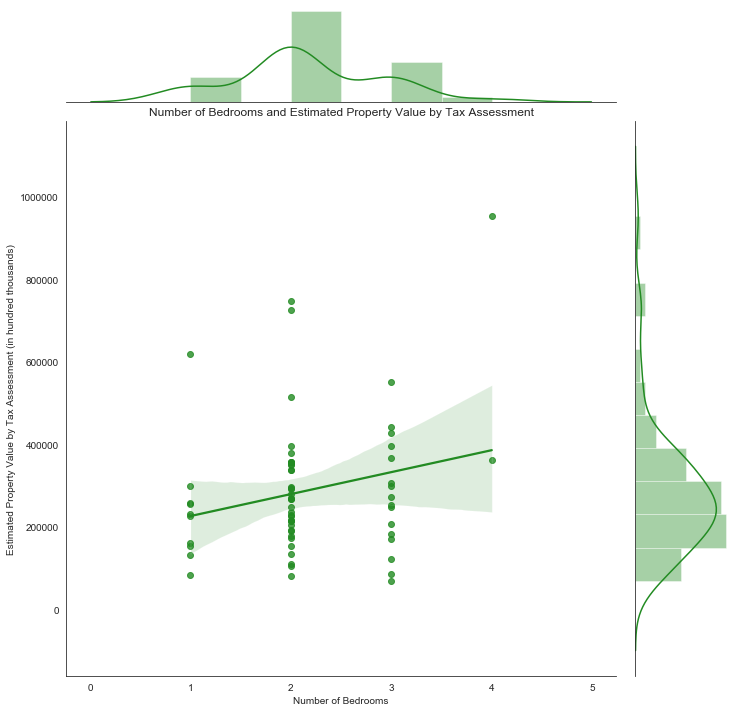

In [30]:
#evaluating tax value assessment to number of bedrooms
with sns.axes_style('white'):
    j = sns.jointplot( "bedroom_count", "tax_value_dollar_count",data=train, kind='reg', height=10, color= 'ForestGreen');
    plt.xlabel('Number of Bedrooms')
    plt.ylabel('Estimated Property Value by Tax Assessment (in hundred thousands)')
    plt.title ('Number of Bedrooms and Estimated Property Value by Tax Assessment')
    plt.show()

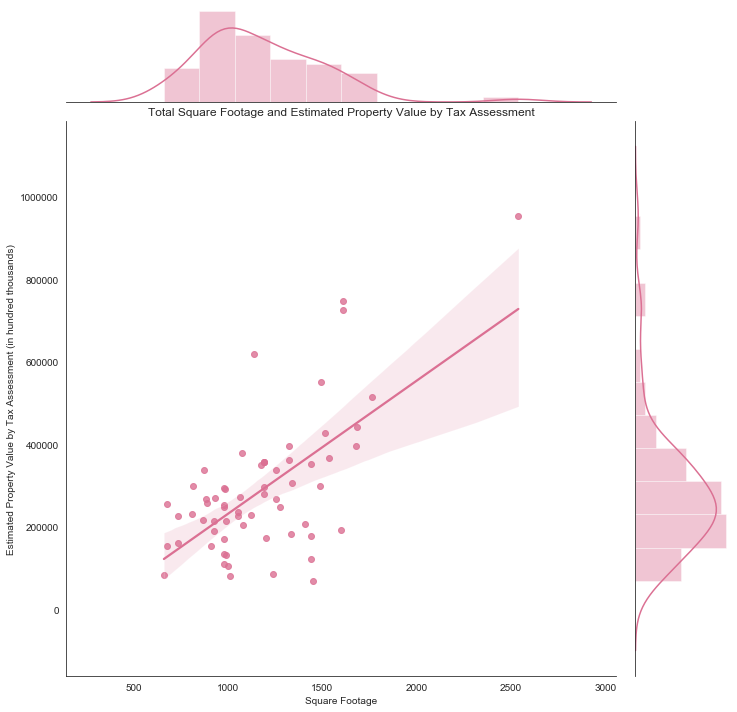

In [41]:
#evaluating tax value assessment to square footage
with sns.axes_style('white'):
    j = sns.jointplot( "square_feet", "tax_value_dollar_count",data=train, kind='reg', height=10, color= 'palevioletred');
    plt.xlabel('Square Footage')
    plt.ylabel('Estimated Property Value by Tax Assessment (in hundred thousands)')
    plt.title ('Total Square Footage and Estimated Property Value by Tax Assessment')
    plt.show()